# 01 Exploratory Data Analysis

### Table of Contents

### [1. Exploratory Analysis](#1-exploratory-analysis)
- [1.1 Load Data](#11-load-data)
- [1.2 Plot distributions for numerical features](#12-plot-distributions-for-numerical-features)  
- [1.3 Target Variable Analysis](#13-target-variable-analysis)
- [1.4 Outlier Analysis](#14-outlier-analysis)
- [1.5 Correlation Analysis](#15-correlation-analysis)

### [2. Pre-Processing](#2-pre-processing)
- [2.1 Feature Engineering](#21-feature-engineering)
- [2.2 Data splitting](#22-data-splitting)
- [2.3 Optional PCA](#23-optional-pca)
- [2.4 Standardization](#24-standardization)
- [2.5 Data Leakage Check](#25-data-leakage-check)

### [3. Summary](#3-summary)
- [3.1 Data Summary](#31-data-summary)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

## 1: Exploratory Analysis

#### 1.1 Load Data

In [2]:
# Load your data
df = pd.read_csv('../data/dataset_storage/final/all_matched_data.csv')
df

,close,metrics_long_short_ratio,open,low,volume,metrics_funding_rate,doge_close,sol_close,fng_fng,instrument_id,eth_close,ts_since_listing,high,metrics_open_interest,timestamp,btc_close
0,2.3721,0.000000,2.5000,2.2540,364165.9,0.0000,0.27947,245.08,52,0GUSDT-LINEAR,4577.98,1,2.5000,0.0,2025-09-18 07:30:00,117158.5
1,2.3825,0.000000,2.3721,2.3330,141187.8,0.0000,0.27973,244.63,52,0GUSDT-LINEAR,4572.66,2,2.4077,0.0,2025-09-18 07:45:00,117031.2
2,2.4558,0.000000,2.3825,2.2996,236802.1,0.0000,0.28108,245.48,52,0GUSDT-LINEAR,4580.81,3,2.5173,222419.5,2025-09-18 08:00:00,117190.1
3,2.4960,0.000000,2.4558,2.4196,260433.9,0.0000,0.28134,246.03,52,0GUSDT-LINEAR,4590.36,4,2.5990,222419.5,2025-09-18 08:15:00,117271.8
4,2.4229,0.000000,2.4960,2.3759,159007.6,0.0000,0.28081,246.39,52,0GUSDT-LINEAR,4592.27,5,2.5066,222419.5,2025-09-18 08:30:00,117153.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869780,3.9985,1.896871,3.9974,3.9860,44211.5,0.0001,0.12181,155.96,69,ZROUSDT-LINEAR,3393.40,2624,4.0031,4552538.4,2024-07-17 22:45:00,64230.8
869781,3.9845,1.896871,3.9985,3.9745,56726.6,0.0001,0.12160,155.40,69,ZROUSDT-LINEAR,3387.61,2625,3.9985,4552538.4,2024-07-17 23:00:00,64136.7
869782,4.0270,1.896871,3.9845,3.9832,128534.6,0.0001,0.12211,155.97,69,ZROUSDT-LINEAR,3400.17,2626,4.0394,4552538.4,2024-07-17 23:15:00,64261.2
869783,4.0156,1.896871,4.0270,4.0109,71288.7,0.0001,0.12206,155.79,69,ZROUSDT-LINEAR,3395.61,2627,4.0348,4552538.4,2024-07-17 23:30:00,64190.9


In [3]:
print("="*50)
print("DATA AUDIT")
print("="*50)

print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nBasic statistics:")
print(df.describe())

print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Missing values
print("\nMissing values:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

DATA AUDIT
Dataset shape: (869785, 16)

Data types:
close                       float64
metrics_long_short_ratio    float64
open                        float64
low                         float64
volume                      float64
metrics_funding_rate        float64
doge_close                  float64
sol_close                   float64
fng_fng                       int64
instrument_id                object
eth_close                   float64
ts_since_listing              int64
high                        float64
metrics_open_interest       float64
timestamp                    object
btc_close                   float64
dtype: object

Basic statistics:
               close  metrics_long_short_ratio           open            low  \
count  869785.000000             869785.000000  869785.000000  869785.000000   
mean       15.109098                  1.618819      15.108485      15.064307   
std       182.556524                  1.805793     182.551793     182.343820   
min         0.00072

#### 1.2 Plot distributions for numerical features


FEATURE PLOTS


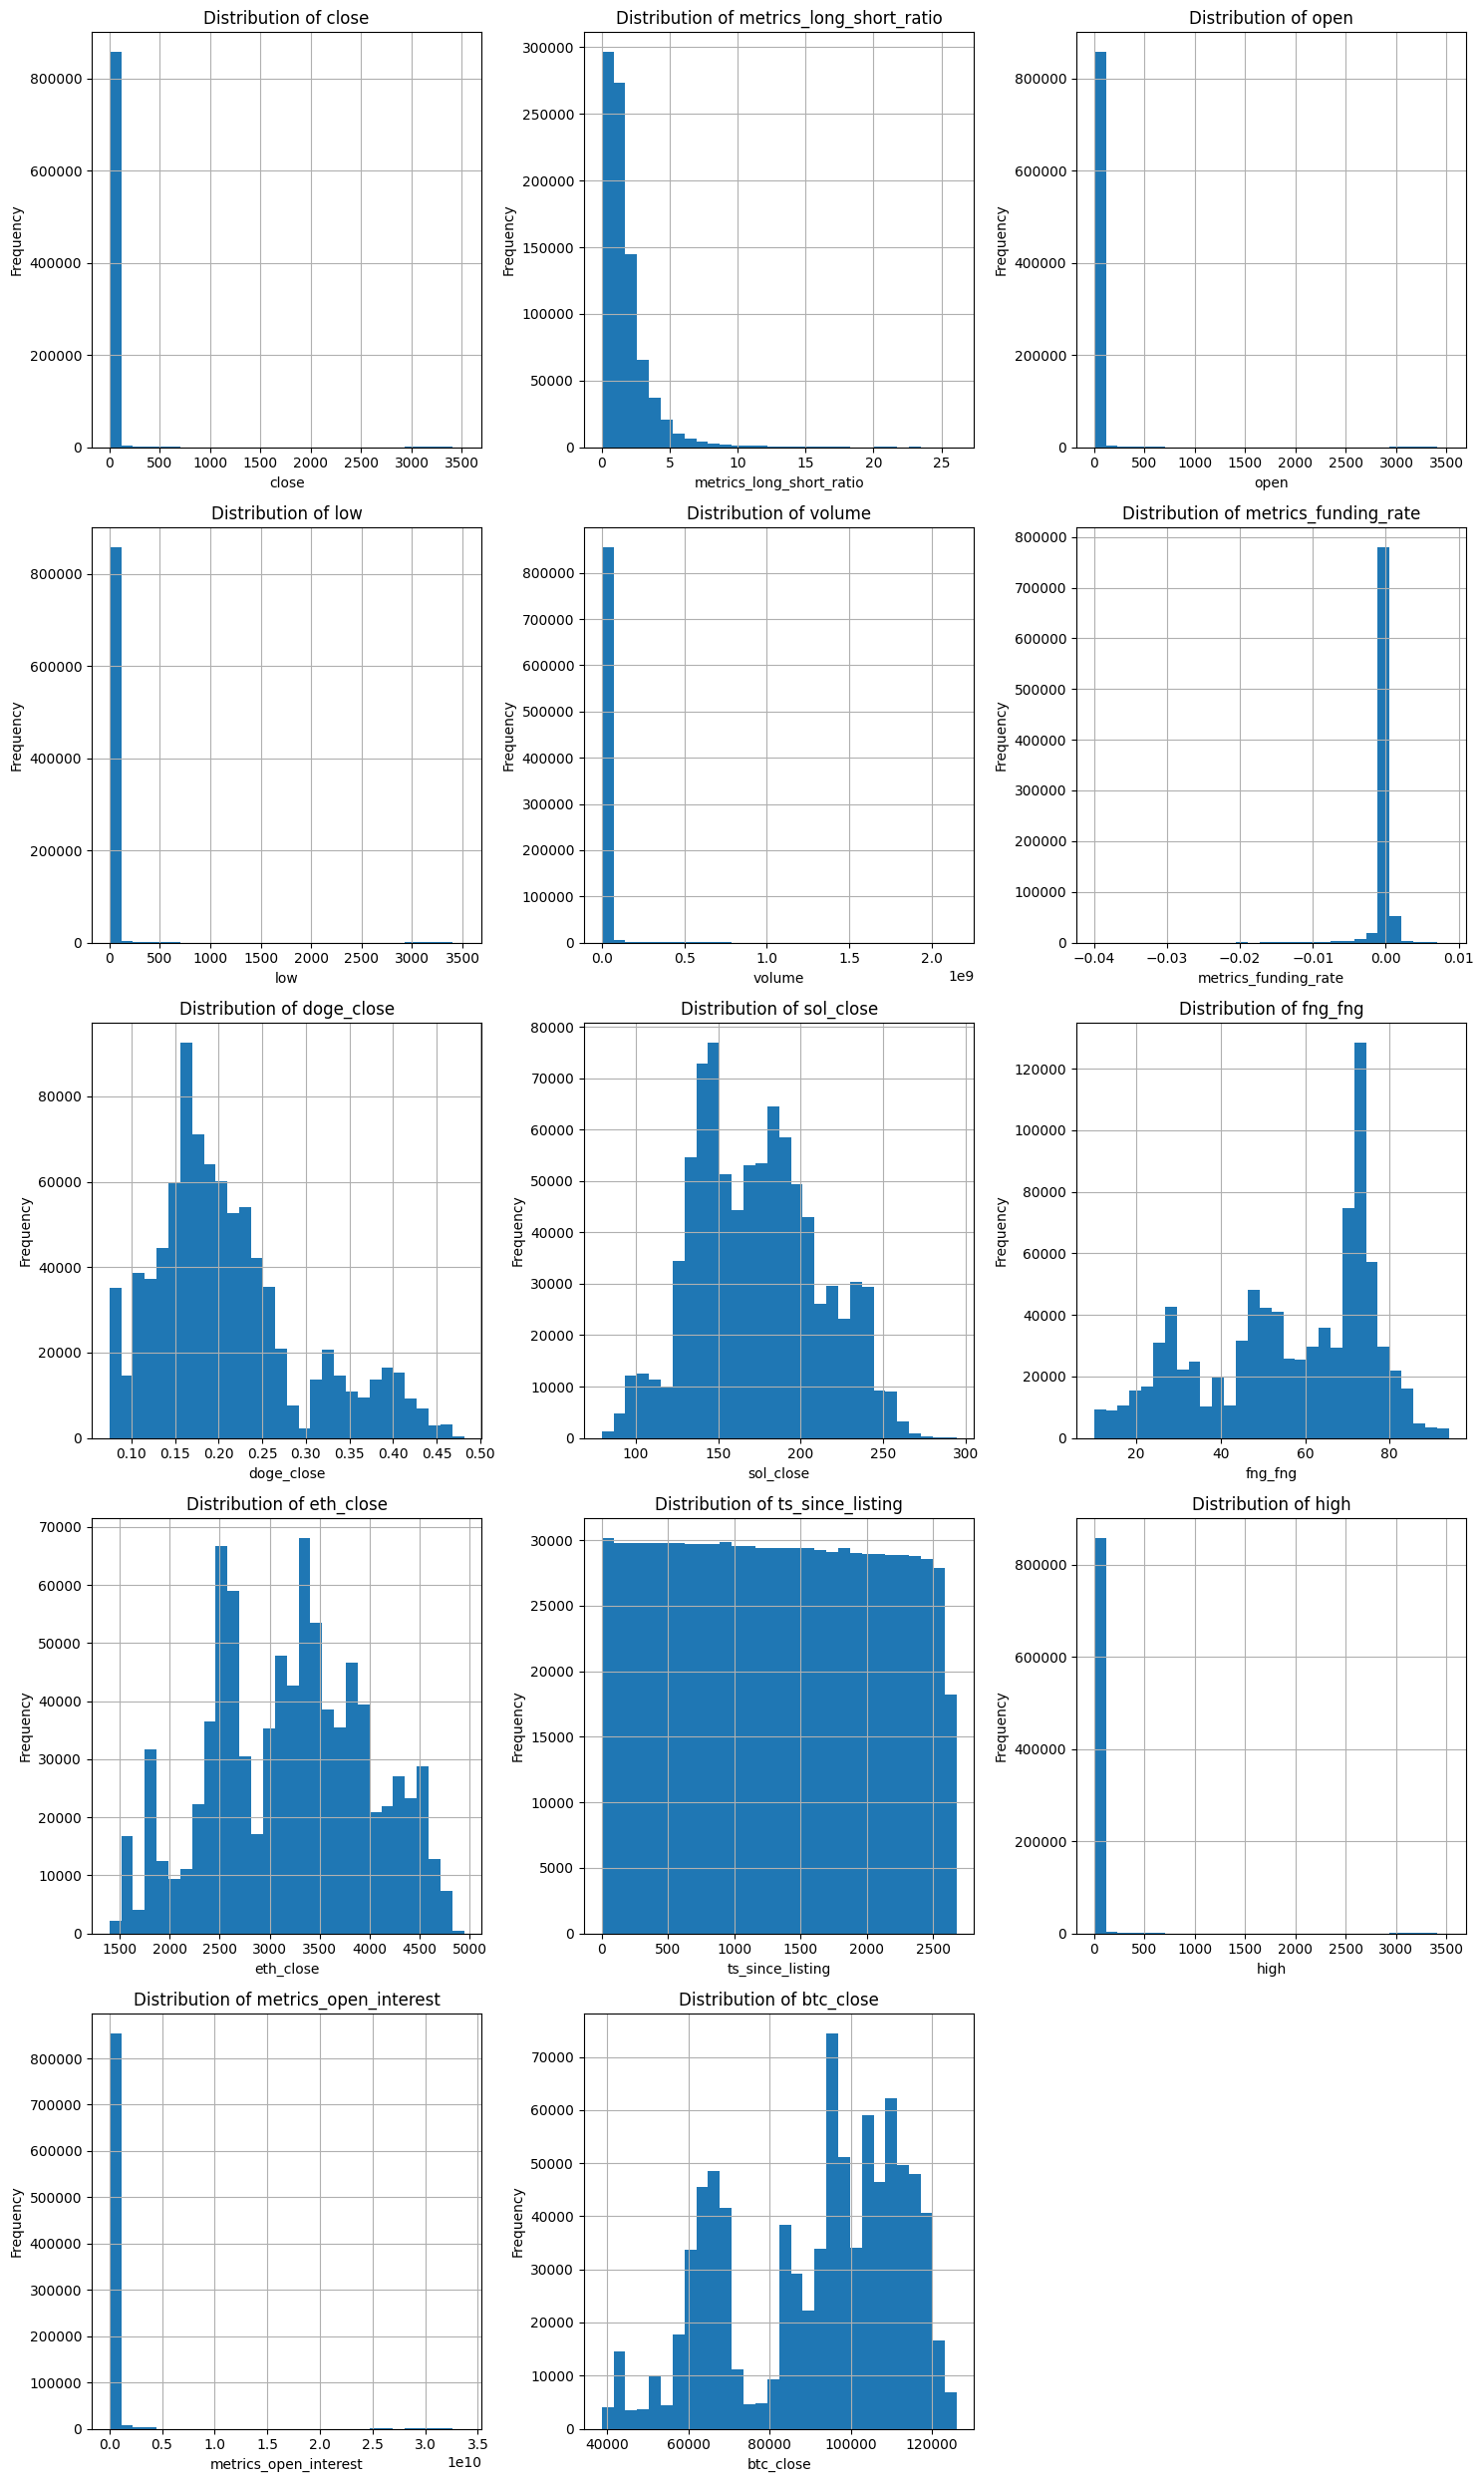

In [4]:
print("\n" + "="*50)
print("FEATURE PLOTS")
print("="*50)

# Plot distributions for numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns
n_cols = 3
n_rows = (len(numerical_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes]

for i, feature in enumerate(numerical_features):
    if i < len(axes):
        df[feature].hist(bins=30, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')

# Remove empty subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


SCATTER PLOTS FOR INTERESTING FEATURE COMPONENTS


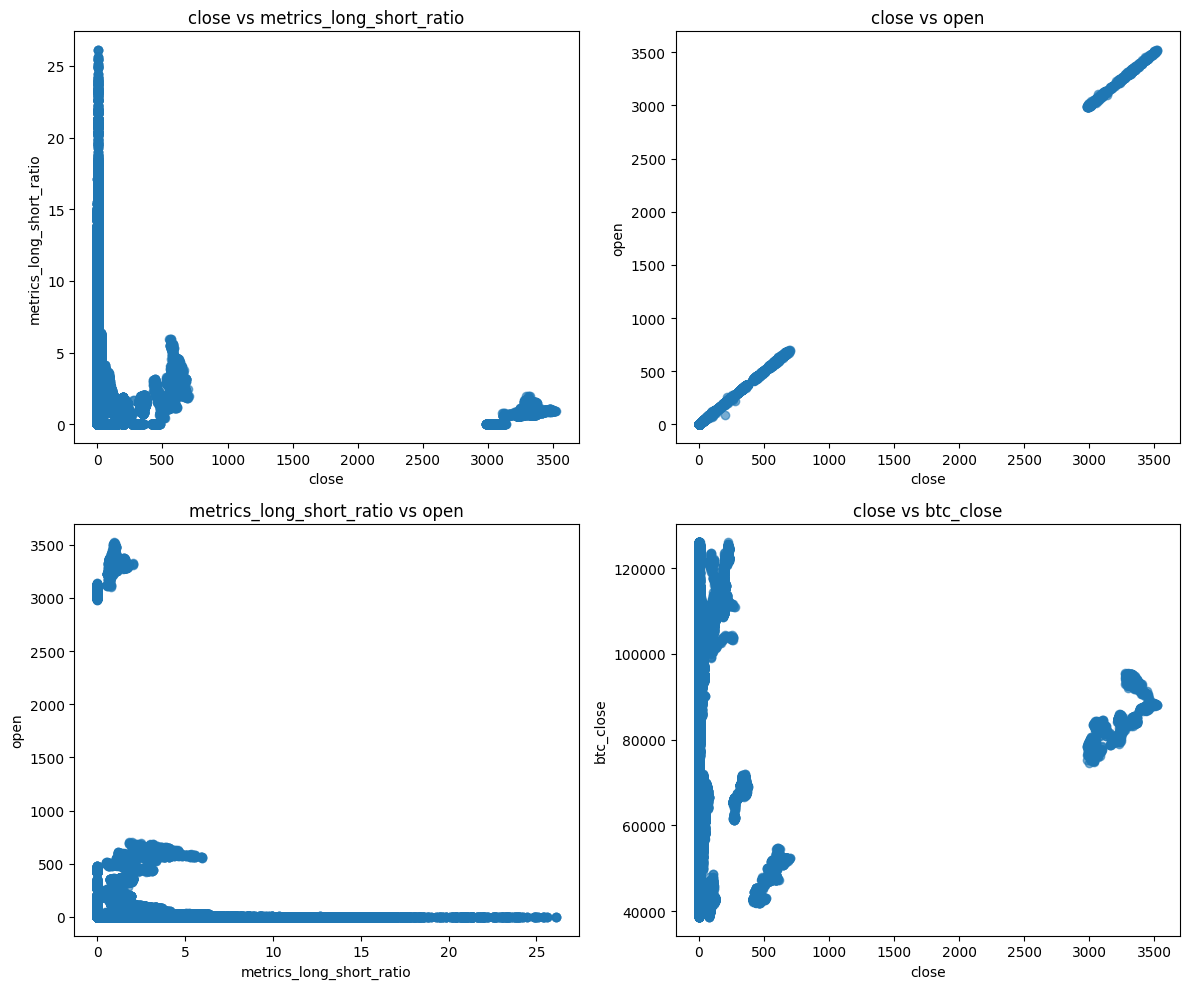

In [ ]:
# Create scatter plots for feature pairs (modify as needed)
# Example: plotting first few numerical features against each other
if len(numerical_features) >= 2:
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()
    
    # You can customize these pairs based on your domain knowledge
    feature_pairs = [
        (numerical_features[0], numerical_features[1]),
        (numerical_features[0], numerical_features[2]) if len(numerical_features) > 2 else (numerical_features[0], numerical_features[1]),
        (numerical_features[1], numerical_features[2]) if len(numerical_features) > 2 else (numerical_features[0], numerical_features[1]),
        (numerical_features[0], numerical_features[-1])
    ]
    
    for i, (feat1, feat2) in enumerate(feature_pairs):
        if i < 4:
            axes[i].scatter(df[feat1], df[feat2], alpha=0.6)
            axes[i].set_xlabel(feat1)
            axes[i].set_ylabel(feat2)
            axes[i].set_title(f'{feat1} vs {feat2}')
    
    plt.tight_layout()
    plt.show()

#### 1.4 Outlier Analysis


OUTLIER ANALYSIS


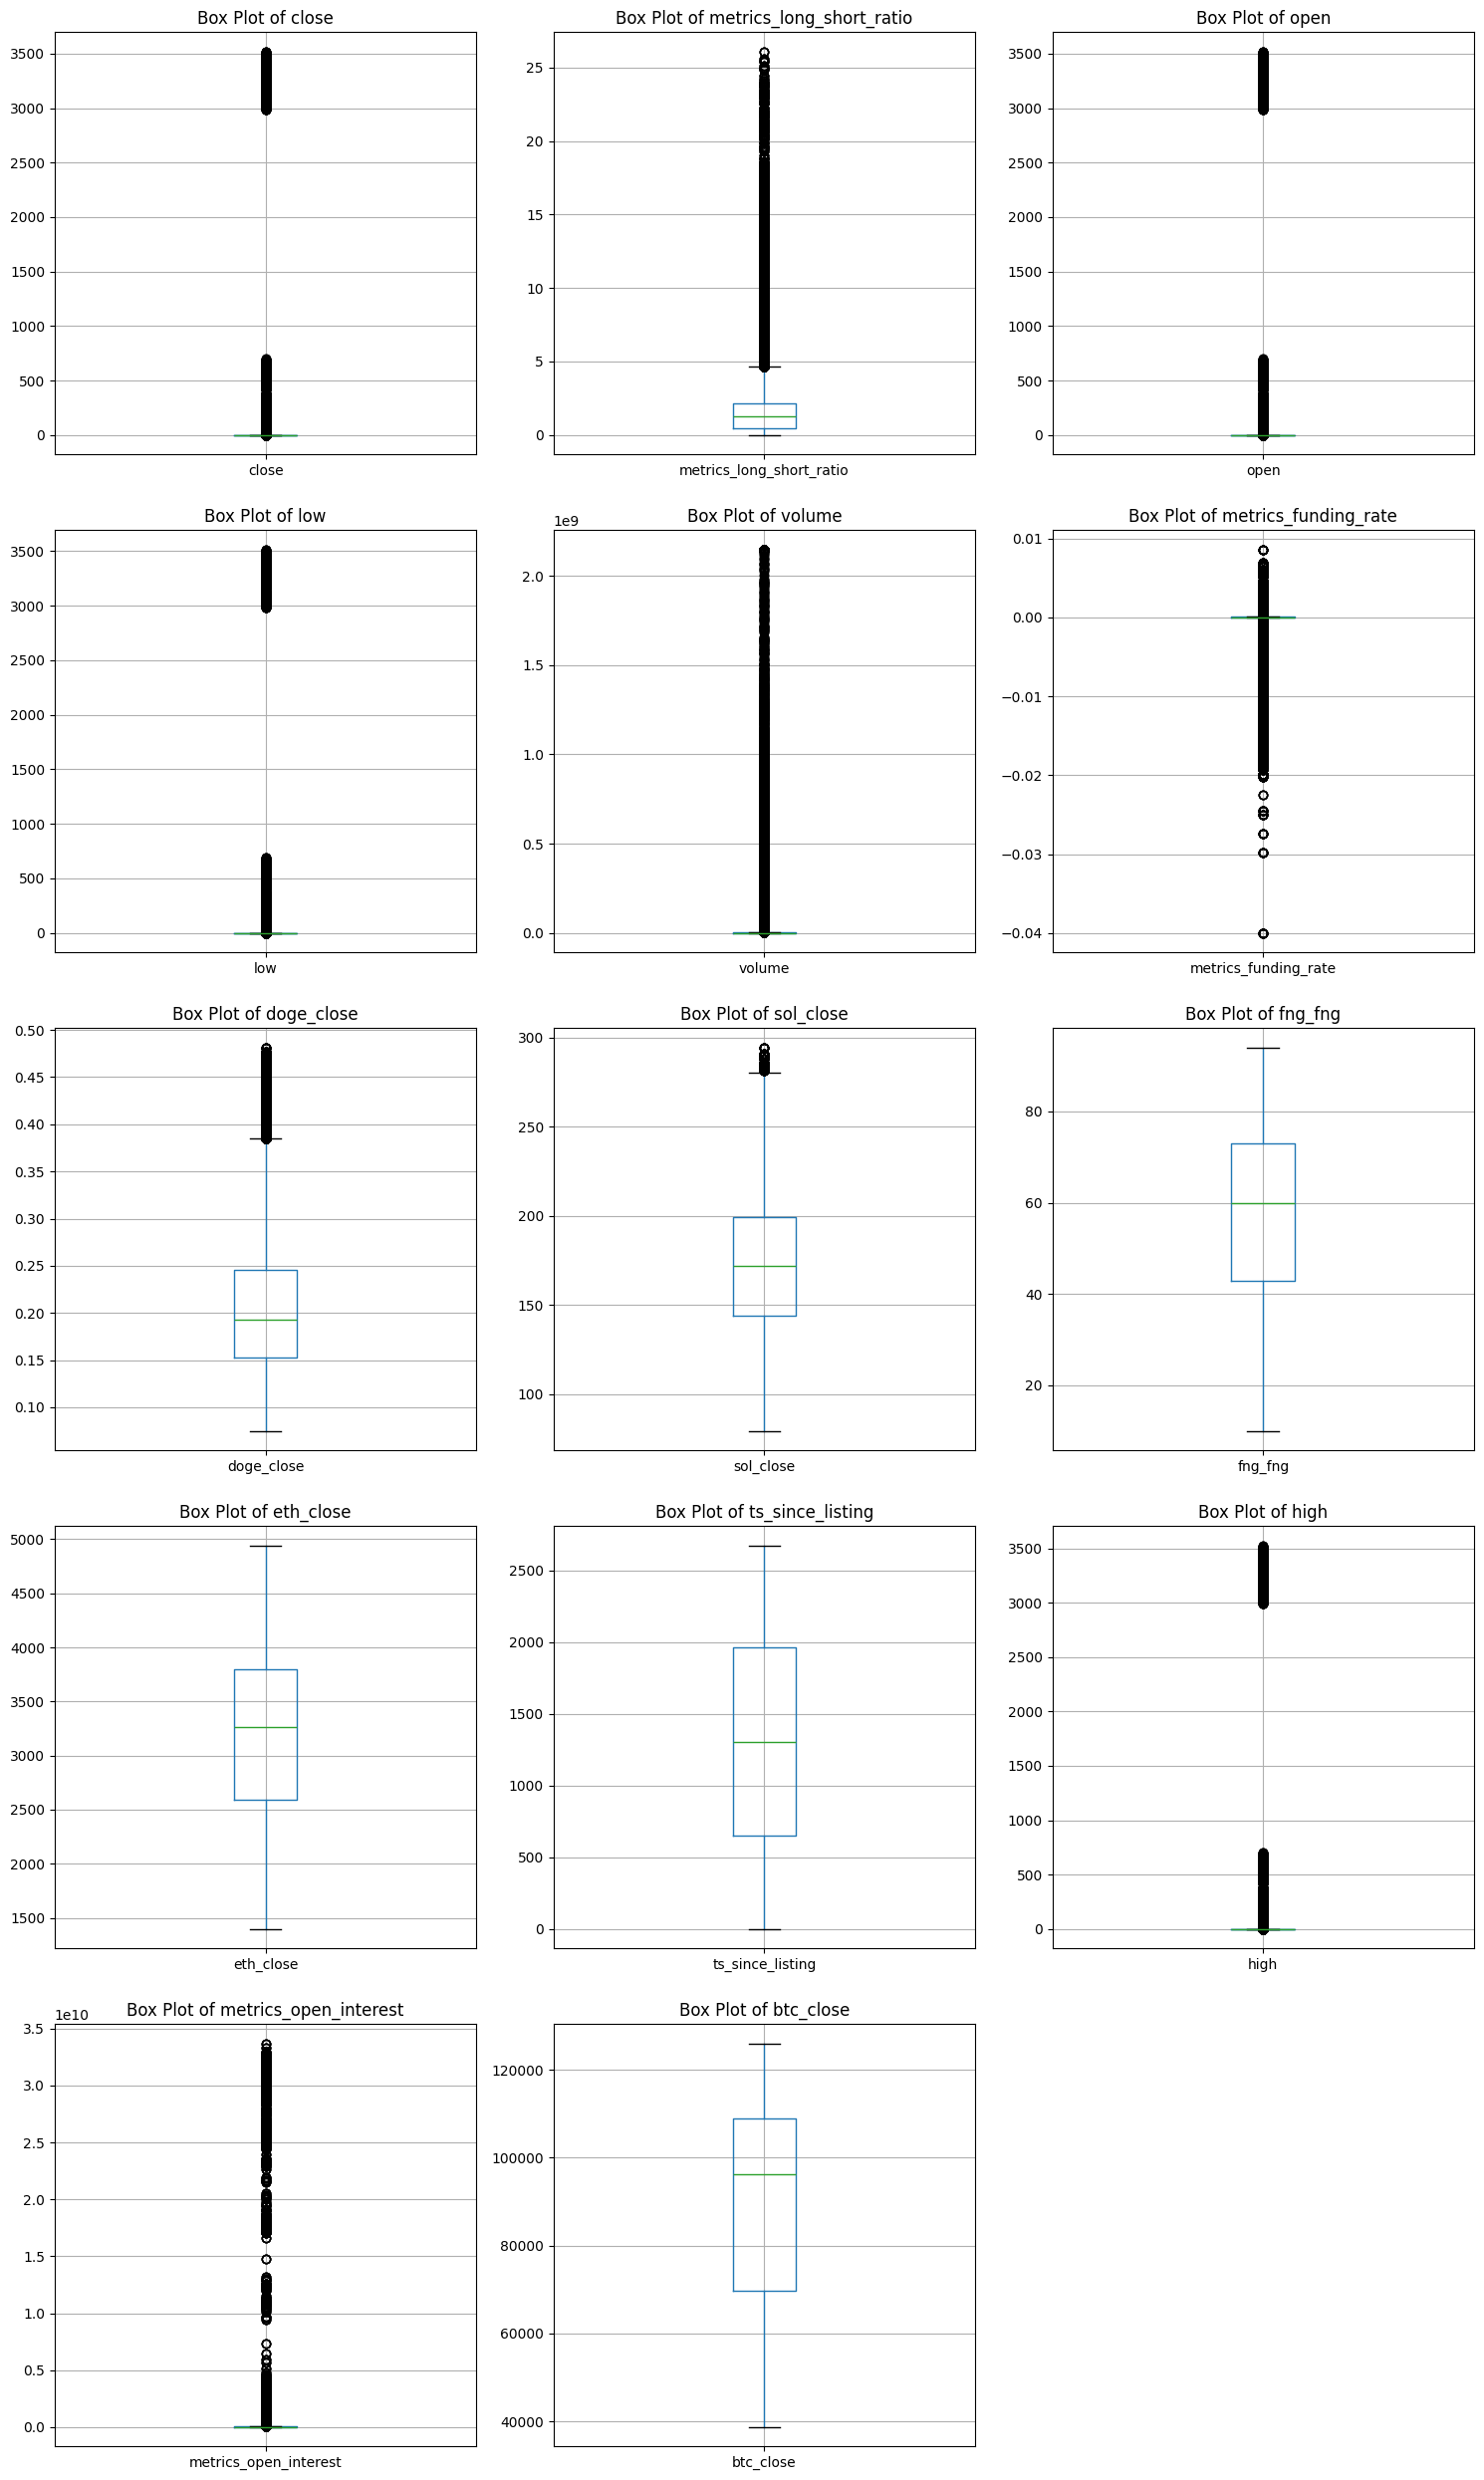

In [7]:
# Box plots for numerical features
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes]

print("\n" + "="*50)
print("OUTLIER ANALYSIS")
print("="*50)

for i, feature in enumerate(numerical_features):
    if i < len(axes):
        df.boxplot(column=feature, ax=axes[i])
        axes[i].set_title(f'Box Plot of {feature}')

# Remove empty subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [8]:
# Statistical outlier detection (IQR method)
print("Outlier detection using IQR method:")
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"{feature}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

Outlier detection using IQR method:
close: 119442 outliers (13.73%)
metrics_long_short_ratio: 43782 outliers (5.03%)
open: 119430 outliers (13.73%)
low: 119426 outliers (13.73%)
volume: 124162 outliers (14.28%)
metrics_funding_rate: 227633 outliers (26.17%)
doge_close: 56215 outliers (6.46%)
sol_close: 198 outliers (0.02%)
fng_fng: 0 outliers (0.00%)
eth_close: 0 outliers (0.00%)
ts_since_listing: 0 outliers (0.00%)
high: 119452 outliers (13.73%)
metrics_open_interest: 127184 outliers (14.62%)
btc_close: 0 outliers (0.00%)


#### 1.5 Correlation Analysis

Correlation Matrix:
                             close  metrics_long_short_ratio      open  \
close                     1.000000                 -0.022622  0.999997   
metrics_long_short_ratio -0.022622                  1.000000 -0.022622   
open                      0.999997                 -0.022622  1.000000   
low                       0.999997                 -0.022613  0.999998   
volume                   -0.010545                  0.040281 -0.010545   
metrics_funding_rate      0.009488                  0.117744  0.009487   
doge_close               -0.046892                  0.034484 -0.046890   
sol_close                -0.073846                  0.041580 -0.073844   
fng_fng                  -0.029817                  0.194270 -0.029814   
eth_close                -0.104494                  0.133855 -0.104493   
ts_since_listing          0.003510                  0.393102  0.003511   
high                      0.999998                 -0.022635  0.999997   
metrics_open_inter

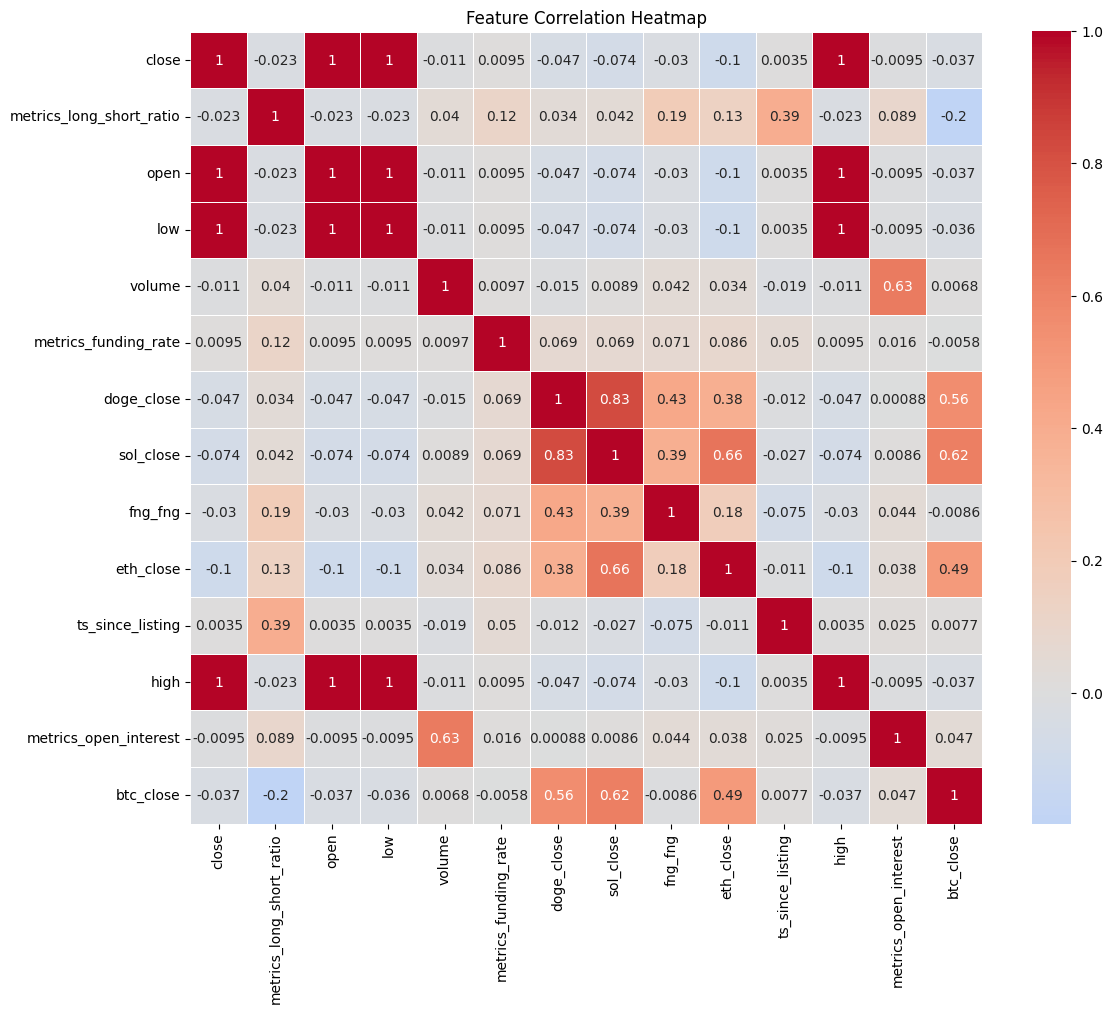

In [9]:
# Correlation matrix
correlation_matrix = df[numerical_features].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [10]:
# High correlation pairs
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7 and abs(correlation_matrix.iloc[i, j]) < 1-1e8:  # Threshold for high correlation
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                  correlation_matrix.columns[j], 
                                  correlation_matrix.iloc[i, j]))

if high_corr_pairs:
    print("\nHighly correlated feature pairs (|correlation| > 0.7):")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"{feat1} - {feat2}: {corr:.3f}")
else:
    print("\nNo highly correlated feature pairs found (threshold: 0.7)")


No highly correlated feature pairs found (threshold: 0.7)


## 2: Example Coin

In [11]:
def plot_candlestick_chart(instrument_id: str):
    df_instrument = df[df["instrument_id"] == instrument_id]

    df_instrument["timestamp"] = pd.to_datetime(df_instrument["timestamp"])
    df_instrument = df_instrument.set_index("timestamp")
    
    mpf.plot(
        df_instrument[["open", "high", "low", "close", "volume"]],
        type="candle",
        volume=True,
        style="charles",
        title=instrument_id,
        ylabel="Price",
        ylabel_lower="Volume",
        figsize=(14, 7)
    )

    mpf.plot(
        df_instrument[["open", "high", "low", "close", "volume"]][:4*24],
        type="candle",
        volume=True,
        style="charles",
        title=instrument_id,
        ylabel="Price",
        ylabel_lower="Volume",
        figsize=(14, 7)
    )

In [12]:
def get_low_volume_instruments(threshold=3e6):
    low_volume_ids = []
    for i in df["instrument_id"].unique():
        if df[df["instrument_id"] == i]["volume"].max() < threshold:
            low_volume_ids.append(i)
    return low_volume_ids


In [13]:
llist = get_low_volume_instruments()
len(llist)

54

In [14]:
bearishs = ['1000000BABYDOGEUSDT-LINEAR',
 '10000ELONUSDT-LINEAR',
 '10000QUBICUSDT-LINEAR',
 '1000TOSHIUSDT-LINEAR',
 '2ZUSDT-LINEAR',
 '4USDT-LINEAR',
 'ACXUSDT-LINEAR',
 'AINUSDT-LINEAR',
 'AIOZUSDT-LINEAR',
 'AKEUSDT-LINEAR',
 'ALCHUSDT-LINEAR',
 'ALLOUSDT-LINEAR']

In [15]:
# first_10_instruments = llist[:10] #list(df["instrument_id"].unique()[0:10])
# for i in bearishs:
#     plot_candlestick_chart(i)

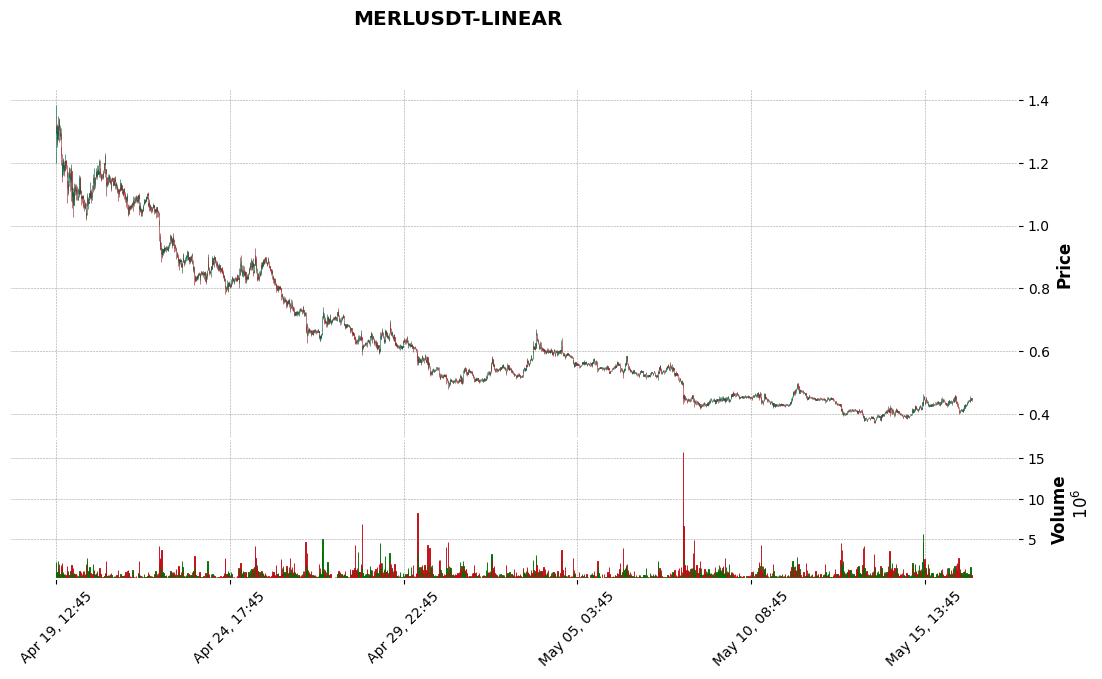

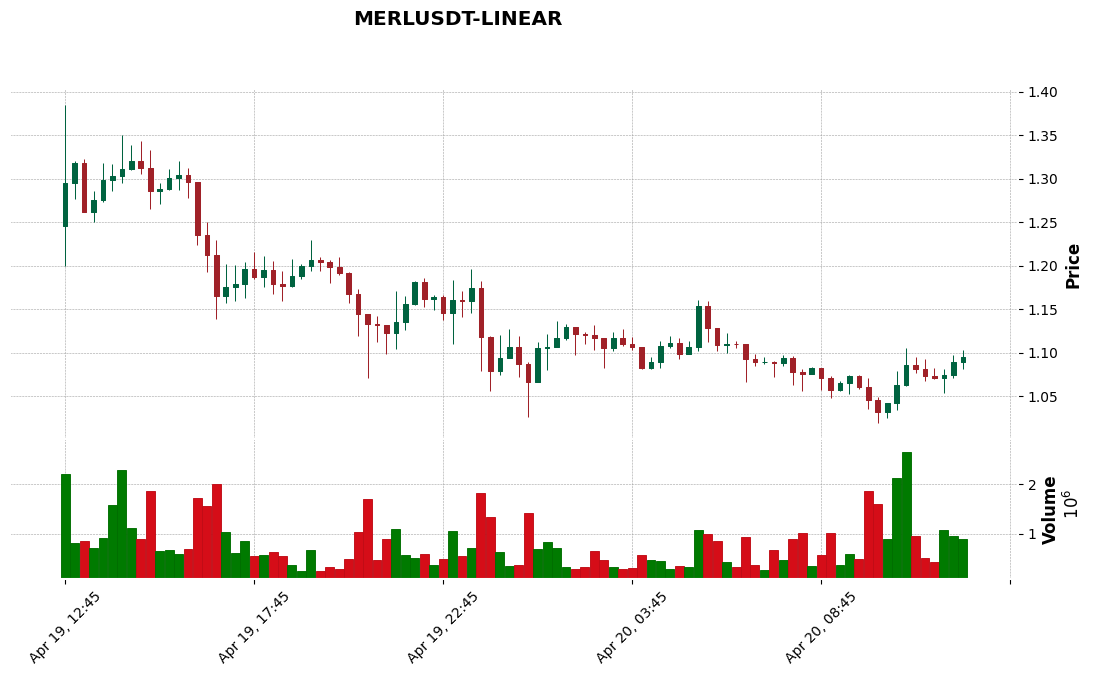

In [18]:
plot_candlestick_chart("MERLUSDT-LINEAR")

## 3: PRE-PROCESSING

#### 2.1 Feature Engineering

#### 2.2 Data splitting

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# print(f"Training set size: {X_train.shape}")
# print(f"Test set size: {X_test.shape}")

#### 2.3 Optional PCA

#### 2.4 Standardization

In [ ]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

#### 2.5 Data Leakage Check

## 3: Summary

#### 3.1 Data Summary

[Description of final metrics, model success, special things to mention]